In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import plotly.graph_objects as go
import random
pd.options.display.max_columns=1000000
pd.options.display.max_rows=100

In [2]:
file = 'arcos_all_washpost.tsv'

In [3]:
# alternate method for taking random sample from file

#"""
#How do you ensure reproducibility? The answer is 42
random.seed(42)

p = 0.01  # set p to whatever percentage of lines necessary
# keep the header, then take only p% of lines
# if random from [0,1] interval is greater than 0.01 the row will be skipped
df = pd.read_csv(file, sep = '\t', skiprows=lambda i: i>0 and random.random() > p, low_memory=False)

#"""

In [4]:
df.head()

,REPORTER_DEA_NO,REPORTER_BUS_ACT,REPORTER_NAME,REPORTER_ADDL_CO_INFO,REPORTER_ADDRESS1,REPORTER_ADDRESS2,REPORTER_CITY,REPORTER_STATE,REPORTER_ZIP,REPORTER_COUNTY,BUYER_DEA_NO,BUYER_BUS_ACT,BUYER_NAME,BUYER_ADDL_CO_INFO,BUYER_ADDRESS1,BUYER_ADDRESS2,BUYER_CITY,BUYER_STATE,BUYER_ZIP,BUYER_COUNTY,TRANSACTION_CODE,DRUG_CODE,NDC_NO,DRUG_NAME,QUANTITY,UNIT,ACTION_INDICATOR,ORDER_FORM_NO,CORRECTION_NO,STRENGTH,TRANSACTION_DATE,CALC_BASE_WT_IN_GM,DOSAGE_UNIT,TRANSACTION_ID,Product_Name,Ingredient_Name,Measure,MME_Conversion_Factor,Combined_Labeler_Name,Revised_Company_Name,Reporter_family,dos_str
0,PA0021179,DISTRIBUTOR,APOTHECA INC,NaN,1622 N 16TH ST,NaN,PHOENIX,AZ,85006,MARICOPA,FA1240592,RETAIL PHARMACY,AVELLA OF DEER VALLEY,NaN,23620 N 20TH DR #12,NaN,PHOENIX,AZ,85085,MARICOPA,S,9193,12634051496,HYDROCODONE,4.0,NaN,NaN,NaN,NaN,NaN,11052009,0.072648,24.0,24,HYDROCODONE BITARTRATE & ACETA 5MG/,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,Apotheca Inc.,Apotheca Inc.,Apotheca Inc,5.0
1,PB0020052,DISTRIBUTOR,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS WAREHOUSE,520 EAST MAIN ST.,NaN,GOUVERNEUR,NY,13642,SAINT LAWRENCE,AB1113404,CHAIN PHARMACY,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS #09,700 CANTON STREET,NaN,OGDENSBURG,NY,13669,SAINT LAWRENCE,S,9193,00591034905,HYDROCODONE,6.0,NaN,NaN,NaN,NaN,0.0,9032006,9.081000,3000.0,104,HYDROCODONE BIT 5MG/ACETAMINOPHEN 50,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,"Actavis Pharma, Inc.","Allergan, Inc.","KPH Healthcare Services, Inc.",5.0
2,PB0020052,DISTRIBUTOR,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS WAREHOUSE,520 EAST MAIN ST.,NaN,GOUVERNEUR,NY,13642,SAINT LAWRENCE,AK0563723,CHAIN PHARMACY,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS #13,1729 STATE STREET,NaN,WATERTOWN,NY,13601,JEFFERSON,S,9193,00591038701,HYDROCODONE,3.0,NaN,NaN,NaN,NaN,NaN,8242011,1.362150,300.0,1376,HYDROCODONE BIT. 7.5MG/ACETAMINOPHEN,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,"Actavis Pharma, Inc.","Allergan, Inc.","KPH Healthcare Services, Inc.",7.5
3,PB0020052,DISTRIBUTOR,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS WAREHOUSE,520 EAST MAIN ST.,NaN,GOUVERNEUR,NY,13642,SAINT LAWRENCE,AK0563735,CHAIN PHARMACY,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS #15,1304 WASHINGTON ST,NaN,WATERTOWN,NY,13601,JEFFERSON,S,9193,00591038701,HYDROCODONE,1.0,NaN,NaN,NaN,NaN,0.0,3252010,0.454050,100.0,1315,HYDROCODONE BIT. 7.5MG/ACETAMINOPHEN,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,"Actavis Pharma, Inc.","Allergan, Inc.","KPH Healthcare Services, Inc.",7.5
4,PB0020052,DISTRIBUTOR,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS WAREHOUSE,520 EAST MAIN ST.,NaN,GOUVERNEUR,NY,13642,SAINT LAWRENCE,AK0563735,CHAIN PHARMACY,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS #15,1304 WASHINGTON ST,NaN,WATERTOWN,NY,13601,JEFFERSON,S,9193,00591054001,HYDROCODONE,1.0,NaN,NaN,NaN,NaN,0.0,3232011,0.605400,100.0,1438,HYDROCODONE BIT. 10MG/ACETAMINOPHEN,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,"Actavis Pharma, Inc.","Allergan, Inc.","KPH Healthcare Services, Inc.",10.0


In [5]:
df.describe(include='all')

,REPORTER_DEA_NO,REPORTER_BUS_ACT,REPORTER_NAME,REPORTER_ADDL_CO_INFO,REPORTER_ADDRESS1,REPORTER_ADDRESS2,REPORTER_CITY,REPORTER_STATE,REPORTER_ZIP,REPORTER_COUNTY,BUYER_DEA_NO,BUYER_BUS_ACT,BUYER_NAME,BUYER_ADDL_CO_INFO,BUYER_ADDRESS1,BUYER_ADDRESS2,BUYER_CITY,BUYER_STATE,BUYER_ZIP,BUYER_COUNTY,TRANSACTION_CODE,DRUG_CODE,NDC_NO,DRUG_NAME,QUANTITY,UNIT,ACTION_INDICATOR,ORDER_FORM_NO,CORRECTION_NO,STRENGTH,TRANSACTION_DATE,CALC_BASE_WT_IN_GM,DOSAGE_UNIT,TRANSACTION_ID,Product_Name,Ingredient_Name,Measure,MME_Conversion_Factor,Combined_Labeler_Name,Revised_Company_Name,Reporter_family,dos_str
count,1782474,1782474,1782474,62944,1782474,740435,1782474,1782474,1.782474e+06,1782474,1782474,1782474,1782474,795733,1782474,367503,1782474,1782474,1.782474e+06,1782438,1782474,1.782474e+06,1782474,1782474,1.782474e+06,3,5751,687579,6.060000e+02,439778.000000,1.782474e+06,1.782474e+06,1.782472e+06,1.782474e+06,1782474,1782474,1782474,1.782474e+06,1781968,1781968,1782474,1.779236e+06
unique,505,3,362,86,463,154,341,49,NaN,206,84607,6,47428,32004,77153,16225,9245,55,NaN,1831,1,NaN,1743,2,NaN,2,2,505015,NaN,NaN,NaN,NaN,NaN,NaN,708,3,1,NaN,84,80,278,NaN
top,RW0294493,DISTRIBUTOR,MCKESSON CORPORATION,D/B/A RITE AID LIVERPOOL DISTRIBUTION CENTER (...,DBA MCKESSON DRUG CO.,ATTN: C II MANAGER,ROGERS,CA,NaN,BENTON,BK4844658,CHAIN PHARMACY,WALGREEN CO.,ATTN PHARMACY,ATTN: PHARMACY,SUITE A,HOUSTON,CA,NaN,LOS ANGELES,S,NaN,00406035705,HYDROCODONE,NaN,1,I,000000000,NaN,NaN,NaN,NaN,NaN,NaN,HYDROCODONE BIT. 10MG/ACETAMINOPHEN,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,NaN,SpecGx LLC,Mallinckrodt,McKesson Corporation,NaN
freq,60910,1777410,368728,7354,209116,60910,98582,196893,NaN,98582,448,1161905,209861,3096,23624,5108,11930,138740,NaN,27913,1782474,NaN,96374,1095253,NaN,2,5680,315,NaN,NaN,NaN,NaN,NaN,NaN,125485,1095253,1782474,NaN,652365,652365,376482,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.074697e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.019671e+04,NaN,NaN,9.173723e+03,NaN,NaN,2.708229e+00,NaN,NaN,NaN,5.071219e+06,25.447217,6.745009e+06,3.215573e+00,4.290880e+02,4.710606e+08,NaN,NaN,NaN,1.192772e+00,NaN,NaN,NaN,1.170494e+01
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.777696e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.799416e+04,NaN,NaN,2.433618e+01,NaN,NaN,2.336522e+01,NaN,NaN,NaN,9.604480e+06,157.343778,3.436439e+06,8.143557e+00,1.274201e+03,5.027325e+08,NaN,NaN,NaN,2.433618e-01,NaN,NaN,NaN,1.293546e+01
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.460000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.010000e+02,NaN,NaN,9.143000e+03,NaN,NaN,1.000000e+00,NaN,NaN,NaN,3.000000e+00,0.000000,1.012006e+06,4.034000e-06,6.000000e-04,1.000000e+00,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,2.500000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.009600e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.905900e+04,NaN,NaN,9.143000e+03,NaN,NaN,1.000000e+00,NaN,NaN,NaN,3.118000e+03,0.000000,4.042010e+06,6.054000e-01,1.000000e+02,1.592900e+04,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,5.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.584000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.588700e+04,NaN,NaN,9.193000e+03,NaN,NaN,1.000000e+00,NaN,NaN,NaN,9.376000e+03,0.000000,7.052008e+06,1.793000e+00,2.000000e+02,6.020090e+08,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,7.500000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.317900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.546000e+04,NaN,NaN,9.193000e+03,NaN,NaN,3.000000e+00,NaN,NaN,NaN,3.258830e+05,0.000000,1.003201e+07,3.027000e+00,5.000000e+02,9.110034e+08,NaN,NaN,NaN,1.500000e+00,NaN,NaN,NaN,1.000000e+01


In [6]:
df.shape

(1782474, 42)

In [7]:
cols = ['BUYER_CITY','BUYER_COUNTY','BUYER_STATE','BUYER_ZIP',
        'DRUG_NAME','QUANTITY','TRANSACTION_DATE']
df = df.loc[:,cols]

In [8]:
df.head()

,BUYER_CITY,BUYER_COUNTY,BUYER_STATE,BUYER_ZIP,DRUG_NAME,QUANTITY,TRANSACTION_DATE
0,PHOENIX,MARICOPA,AZ,85085,HYDROCODONE,4.0,11052009
1,OGDENSBURG,SAINT LAWRENCE,NY,13669,HYDROCODONE,6.0,9032006
2,WATERTOWN,JEFFERSON,NY,13601,HYDROCODONE,3.0,8242011
3,WATERTOWN,JEFFERSON,NY,13601,HYDROCODONE,1.0,3252010
4,WATERTOWN,JEFFERSON,NY,13601,HYDROCODONE,1.0,3232011


In [9]:
#check outlier value for quantity
mx = df.loc[df.QUANTITY == df.QUANTITY.max()]
print(mx)

       BUYER_CITY BUYER_COUNTY BUYER_STATE  BUYER_ZIP  DRUG_NAME  QUANTITY  \
981554       TROY        MIAMI          OH      45373  OXYCODONE   18990.0   

        TRANSACTION_DATE  
981554           8162012  


In [10]:
df.dtypes

BUYER_CITY           object
BUYER_COUNTY         object
BUYER_STATE          object
BUYER_ZIP             int64
DRUG_NAME            object
QUANTITY            float64
TRANSACTION_DATE      int64
dtype: object

In [11]:
#zip code is type int, meaning leading zeroes are being dropped
#first convert to string
df['BUYER_ZIP'] = df['BUYER_ZIP'].astype(str)

In [12]:
#now zero-pad
for i, zip_code in enumerate(df['BUYER_ZIP']):
    if len(str(zip_code)) == 4:
        x = '0' + str(zip_code)
        #print(x)
        df['BUYER_ZIP'].values[i] = x
    elif len(str(zip_code)) == 3:
        x = '00' + str(zip_code)
        #print(x)
        df['BUYER_ZIP'].values[i] = x

In [13]:
#similar problem with transaction dates, although now we need it as a datetime object
df['TRANSACTION_DATE'] = df["TRANSACTION_DATE"].astype(int).astype(str)

In [14]:
for i, date in enumerate(df['TRANSACTION_DATE']):
    if len(date) == 7:
        df['TRANSACTION_DATE'].values[i] = '0' + date

In [15]:
#We want to convert datetime to a year column to make it easier to join with overdose data and do time analysis
df['date'] = pd.to_datetime(df['TRANSACTION_DATE'],format = '%m%d%Y')
df.head()
df['year'] = df['date'].dt.year

In [16]:
df_nan = df.loc[df.isnull().any(axis=1)]
df_nan

,BUYER_CITY,BUYER_COUNTY,BUYER_STATE,BUYER_ZIP,DRUG_NAME,QUANTITY,TRANSACTION_DATE,date,year
54931,NORTH LAS VEGAS,NaN,NV,89303,HYDROCODONE,10.0,10052007,2007-10-05,2007
219190,NORTH LAS VEGAS,NaN,NV,89303,OXYCODONE,1.0,09202006,2006-09-20,2006
424864,ELLINGTON,NaN,CT,06209,OXYCODONE,4.0,02142006,2006-02-14,2006
464489,FAIRFIELD,NaN,CT,06430,HYDROCODONE,1.0,10262007,2007-10-26,2007
477018,PRINCETON,NaN,IN,47671,HYDROCODONE,1.0,04172006,2006-04-17,2006
477019,PRINCETON,NaN,IN,47671,OXYCODONE,1.0,07262006,2006-07-26,2006
494721,NORTH LAS VEGAS,NaN,NV,89303,HYDROCODONE,2.0,09212007,2007-09-21,2007
502631,FAIRFIELD,NaN,CT,06430,HYDROCODONE,1.0,10092006,2006-10-09,2006
540061,FAIRFIELD,NaN,CT,06430,OXYCODONE,1.0,04122006,2006-04-12,2006
571219,CAIRO,NaN,GA,31728,HYDROCODONE,1.0,01262006,2006-01-26,2006


In [17]:
# number of rows with no county value is statistically insignificant, so we can just drop them
df = df.dropna()

In [18]:
quan_sum = df.groupby(['BUYER_COUNTY', 'BUYER_STATE', 'year'], as_index = False)['QUANTITY'].sum()

In [19]:
quan_sum.head()

,BUYER_COUNTY,BUYER_STATE,year,QUANTITY
0,ABBEVILLE,SC,2006,19.0
1,ABBEVILLE,SC,2007,30.0
2,ABBEVILLE,SC,2008,29.0
3,ABBEVILLE,SC,2009,53.0
4,ABBEVILLE,SC,2010,47.0


In [20]:
quan_sum.describe(include='all')

,BUYER_COUNTY,BUYER_STATE,year,QUANTITY
count,20998,20998,20998.000000,20998.000000
unique,1831,55,NaN,NaN
top,WASHINGTON,TX,NaN,NaN
freq,211,1520,NaN,NaN
mean,NaN,NaN,2009.009763,229.890609
std,NaN,NaN,1.999416,734.907828
min,NaN,NaN,2006.000000,1.000000
25%,NaN,NaN,2007.000000,17.000000
50%,NaN,NaN,2009.000000,59.000000
75%,NaN,NaN,2011.000000,178.750000


In [21]:
od_df = pd.read_csv('county_od.csv')
od_df.head()

,Unnamed: 0,State,County,Year,Deaths,Population
0,0,Alabama,AUTAUGA,2006,NaN,41447
1,1,Alabama,AUTAUGA,2007,NaN,42221
2,2,Alabama,AUTAUGA,2008,NaN,42820
3,3,Alabama,AUTAUGA,2009,NaN,43419
4,4,Alabama,AUTAUGA,2010,NaN,43811


In [22]:
od_df.describe(include='all')

,Unnamed: 0,State,County,Year,Deaths,Population
count,22029.000000,22029,22029,22029.000000,5183,22029
unique,NaN,51,1882,NaN,283,20240
top,NaN,Texas,WASHINGTON,NaN,10,Missing
freq,NaN,1778,210,NaN,374,42
mean,11014.000000,NaN,NaN,2009.000000,NaN,NaN
std,6359.368876,NaN,NaN,2.000045,NaN,NaN
min,0.000000,NaN,NaN,2006.000000,NaN,NaN
25%,5507.000000,NaN,NaN,2007.000000,NaN,NaN
50%,11014.000000,NaN,NaN,2009.000000,NaN,NaN
75%,16521.000000,NaN,NaN,2011.000000,NaN,NaN


In [23]:
#create state dictionary
state_dict = { 'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'}

In [24]:
#use .map() to change state abbreviations to full names
quan_sum.BUYER_STATE = quan_sum.BUYER_STATE.map(state_dict)

In [25]:
# rename BUYER_STATE column
quan_sum.rename(columns = {'BUYER_STATE': 'state', 'BUYER_COUNTY' : 'county'}, inplace=True)

In [26]:
# rename state and year columns in od_df
od_df.rename(columns = {'State' : 'state', 'Year' : 'year', 'Population' : 'pop', 'Deaths' : 'deaths', 'County' : 'county'}, inplace=True)

In [27]:
quan_sum.sort_values(['state','county']).head(20)

,county,state,year,QUANTITY
757,AUTAUGA,Alabama,2006,115.0
758,AUTAUGA,Alabama,2007,129.0
759,AUTAUGA,Alabama,2008,164.0
760,AUTAUGA,Alabama,2009,143.0
761,AUTAUGA,Alabama,2010,152.0
762,AUTAUGA,Alabama,2011,324.0
763,AUTAUGA,Alabama,2012,179.0
810,BALDWIN,Alabama,2006,439.0
811,BALDWIN,Alabama,2007,426.0
812,BALDWIN,Alabama,2008,468.0


In [49]:
# normalize strings in county columns
#.strip, .str
#no arguments for .strip removes leading and trailing white space
quan_sum.county = quan_sum.county.str.lower().str.strip()

In [50]:
quan_sum.head()

,county,state,year,QUANTITY
0,abbeville,South Carolina,2006,19.0
1,abbeville,South Carolina,2007,30.0
2,abbeville,South Carolina,2008,29.0
3,abbeville,South Carolina,2009,53.0
4,abbeville,South Carolina,2010,47.0


In [51]:
quan_sum.county = quan_sum.county.str.upper()

In [52]:
#repeat for overdose table
od_df.county = od_df.county.str.lower().str.strip()
od_df.county = od_df.county.str.upper()
od_df.head()

,Unnamed: 0,state,county,year,deaths,pop
0,0,Alabama,AUTAUGA,2006,NaN,41447
1,1,Alabama,AUTAUGA,2007,NaN,42221
2,2,Alabama,AUTAUGA,2008,NaN,42820
3,3,Alabama,AUTAUGA,2009,NaN,43419
4,4,Alabama,AUTAUGA,2010,NaN,43811


In [53]:
df_al = od_df[['state', 'county', 'year']]
al_1 = df_al.iloc[0]
al_1 = tuple(al_1)
al_1

('Alabama', 'AUTAUGA', 2006)

In [54]:
df_2 = quan_sum[['state', 'county', 'year']]
al_2 = df_2.loc[757]
al_2 = tuple(al_2)

In [55]:
#check if county columns do in fact match
al_2 == al_1

True

In [56]:
print(al_1)
print(al_2)

('Alabama', 'AUTAUGA', 2006)
('Alabama', 'AUTAUGA', 2006)


In [57]:
al_1 = np.array(al_1)
al_2 = np.array(al_2)

In [58]:
al_1 == al_2


array([ True,  True,  True])

In [59]:
x = al_1[1]
x = np.array(list(x))
print(x)

['A' 'U' 'T' 'A' 'U' 'G' 'A']


In [60]:
od_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [61]:
quan_sum.dtypes

county       object
state        object
year          int64
QUANTITY    float64
dtype: object

In [62]:
od_df.dtypes

state     object
county    object
year       int64
deaths    object
pop       object
dtype: object

In [66]:
quan_sum.county = quan_sum.county.astype(str)
quan_sum.state = quan_sum.state.astype(str)

In [67]:
od_df.county = od_df.county.astype(str)
od_df.state = od_df.state.astype(str)

In [68]:
merge_df = od_df.merge(quan_sum, how='inner', on = ['county', 'state', 'year'])

In [69]:
merge_df.head(20)

,state,county,year,deaths,pop,QUANTITY
0,Alabama,AUTAUGA,2006,NaN,41447,115.0
1,Alabama,AUTAUGA,2007,NaN,42221,129.0
2,Alabama,AUTAUGA,2008,NaN,42820,164.0
3,Alabama,AUTAUGA,2009,NaN,43419,143.0
4,Alabama,AUTAUGA,2010,NaN,43811,152.0
5,Alabama,AUTAUGA,2011,NaN,43940,324.0
6,Alabama,AUTAUGA,2012,NaN,44121,179.0
7,Alabama,BALDWIN,2006,21,149116,439.0
8,Alabama,BALDWIN,2007,28,152939,426.0
9,Alabama,BALDWIN,2008,27,155913,468.0


In [70]:
merge_df.dtypes

state        object
county       object
year          int64
deaths       object
pop          object
QUANTITY    float64
dtype: object

In [74]:
for i, pop in enumerate(merge_df['pop']):
    merge_df['pop'].values[i] = float(pop)

In [75]:
merge_df.dtypes

state        object
county       object
year          int64
deaths       object
pop          object
QUANTITY    float64
dtype: object

In [76]:
# create new columns for prescription rate and overdose rate
merge_df['prescription_rate'] = (merge_df['QUANTITY'] / merge_df['pop'])* 100000

### Issue 1: Filling NaN's in death column

In [78]:
merge_df.head(10)

,state,county,year,deaths,pop,QUANTITY,prescription_rate
0,Alabama,AUTAUGA,2006,NaN,41447,115.0,277.463
1,Alabama,AUTAUGA,2007,NaN,42221,129.0,305.535
2,Alabama,AUTAUGA,2008,NaN,42820,164.0,382.999
3,Alabama,AUTAUGA,2009,NaN,43419,143.0,329.349
4,Alabama,AUTAUGA,2010,NaN,43811,152.0,346.945
5,Alabama,AUTAUGA,2011,NaN,43940,324.0,737.369
6,Alabama,AUTAUGA,2012,NaN,44121,179.0,405.702
7,Alabama,BALDWIN,2006,21,149116,439.0,294.402
8,Alabama,BALDWIN,2007,28,152939,426.0,278.542
9,Alabama,BALDWIN,2008,27,155913,468.0,300.167


In [82]:
#let's try to write a loop that compares previous rows
#if counties match, backfill 
#if they don't, forward fill
#else, just put zero

for i, county in enumerate(merge_df['county']):
        
    for i, death in enumerate(merge_df['deaths']):
        if merge_df['county'].values[i] == merge_df['county'].values[i+1] and death == np.nan:
            x = merge_df['deaths'].values[i+1]
            merge_df['deaths'].values[i] = x
        
        elif merge_df['county'].values[i] == merge_df['county'].values[i-1] and death == np.nan:
            x = merge_df['deaths'].values[i-1]
            merge_df['deaths'].values[i] = x
            
        else:
            merge_df['deaths'].values[i] = 0 

IndexError: index 19570 is out of bounds for axis 0 with size 19570

In [79]:
df = merge_df

In [81]:

for i, county in enumerate(merge_df['county']):
    
    if county[i] == county[i+1]:
        
        for i, death in enumerate(merge_df['deaths']):
            if death.isnull() == True:
                x = merge_df['deaths'].values[i+1]
                merge_df['deaths'].values[i] = x
                
    elif county[i] == county[i-1]:
        
        for i, death in enumerate(merge_df['deaths']):
            if death.isnull() == True:
                x = merge_df['deaths'].values[i-1]
                merge_df['deaths'].values[i] = x
            

IndexError: string index out of range

### End of Issue 1

In [79]:
merge_df.head()

,state,county,year,deaths,pop,QUANTITY,prescription_rate
0,District of Columbia,DISTRICT OF COLUMBIA,2006,12,221264,795.0,359.299
1,District of Columbia,DISTRICT OF COLUMBIA,2007,NaN,228646,683.0,298.715
2,District of Columbia,DISTRICT OF COLUMBIA,2008,18,235420,510.0,216.634
3,District of Columbia,DISTRICT OF COLUMBIA,2009,NaN,247187,787.0,318.382
4,District of Columbia,DISTRICT OF COLUMBIA,2010,21,255534,552.0,216.018


In [83]:
df_check = df.loc[df.deaths.isnull() == True]
df_check

,state,county,year,deaths,pop,QUANTITY,prescription_rate
19569,Wyoming,WESTON,2012,NaN,6841,15.0,219.266


In [83]:
df_nan = df.loc[df.isnull().any(axis=1)]
df_nan

,state,county,year,deaths,pop,QUANTITY,prescription_rate
1,District of Columbia,DISTRICT OF COLUMBIA,2007,NaN,228646,683.0,298.715
3,District of Columbia,DISTRICT OF COLUMBIA,2009,NaN,247187,787.0,318.382


In [84]:
df = df.fillna(method='bfill')

In [85]:
df.head()

,state,county,year,deaths,pop,QUANTITY,prescription_rate
0,District of Columbia,DISTRICT OF COLUMBIA,2006,12,221264.0,795.0,359.299299
1,District of Columbia,DISTRICT OF COLUMBIA,2007,18,228646.0,683.0,298.715044
2,District of Columbia,DISTRICT OF COLUMBIA,2008,18,235420.0,510.0,216.634101
3,District of Columbia,DISTRICT OF COLUMBIA,2009,21,247187.0,787.0,318.382439
4,District of Columbia,DISTRICT OF COLUMBIA,2010,21,255534.0,552.0,216.018221


In [88]:
df.dtypes

state                 object
county                object
year                   int64
deaths                object
pop                  float64
QUANTITY             float64
prescription_rate    float64
dtype: object

In [89]:
df.deaths = df.deaths.astype(int)

In [90]:
#compute overdose rate
df['overdose_rate'] = (df['deaths'] / df['pop'])* 100000

In [95]:
df.head(20)

,state,county,year,deaths,pop,QUANTITY,prescription_rate,overdose_rate
0,District of Columbia,DISTRICT OF COLUMBIA,2006,12,221264.0,795.0,359.299299,5.423386
1,District of Columbia,DISTRICT OF COLUMBIA,2007,18,228646.0,683.0,298.715044,7.872432
2,District of Columbia,DISTRICT OF COLUMBIA,2008,18,235420.0,510.0,216.634101,7.645909
3,District of Columbia,DISTRICT OF COLUMBIA,2009,21,247187.0,787.0,318.382439,8.495592
4,District of Columbia,DISTRICT OF COLUMBIA,2010,21,255534.0,552.0,216.018221,8.218084
5,District of Columbia,DISTRICT OF COLUMBIA,2011,16,266864.0,721.0,270.175070,5.995563
6,District of Columbia,DISTRICT OF COLUMBIA,2012,16,276057.0,717.0,259.728969,5.795904


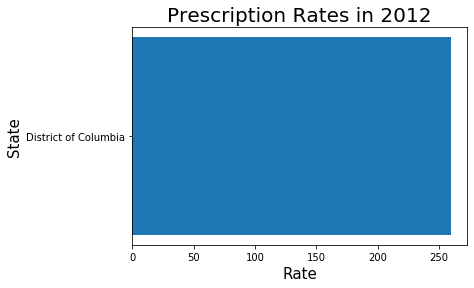

In [96]:
# first select data for year 2012
# sort values for prescription rate and create bar plot
pr_2012 = df.loc[df.year == 2012].sort_values('prescription_rate', ascending=True)
plt.barh(y = pr_2012.state, width = pr_2012.prescription_rate)
plt.xlabel('Rate', fontsize=15)
plt.ylabel('State', fontsize=15)
plt.title('Prescription Rates in 2012', fontsize=20)
plt.rcParams['figure.figsize'] = [25, 30]
plt.show()